In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [4]:
train_dir = r"C:\Users\naman\OneDrive\Desktop\Deep Learning\cifar-10-img\train"
test_dir = r"C:\Users\naman\OneDrive\Desktop\Deep Learning\cifar-10-img\test"

In [5]:
batch_size = 32
img_size = (32, 32)

In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="int"
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="int"
)


Found 40079 files belonging to 10 classes.
Found 9921 files belonging to 10 classes.


In [10]:
class_names = train_ds.class_names

In [11]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

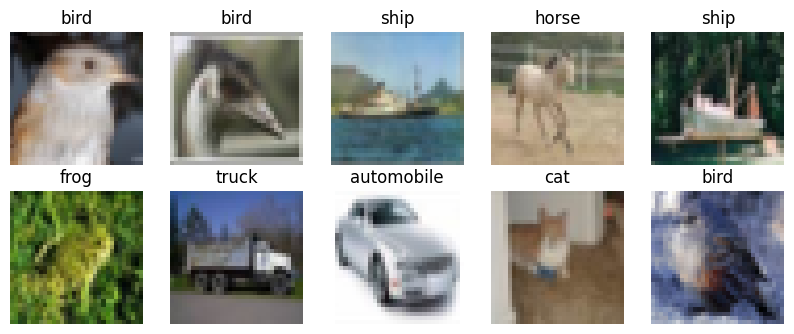

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(10):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
epochs = 10
history = model.fit(train_ds, validation_data=test_ds, epochs=epochs)

Epoch 1/10
1253/1253 [==============================] - 28s 20ms/step - loss: 1.9367 - accuracy: 0.3532 - val_loss: 1.5001 - val_accuracy: 0.4528
Epoch 2/10
1253/1253 [==============================] - 10s 8ms/step - loss: 1.3704 - accuracy: 0.5058 - val_loss: 1.2488 - val_accuracy: 0.5598
Epoch 3/10
1253/1253 [==============================] - 10s 8ms/step - loss: 1.1933 - accuracy: 0.5797 - val_loss: 1.1595 - val_accuracy: 0.5878
Epoch 4/10
1253/1253 [==============================] - 10s 8ms/step - loss: 1.0862 - accuracy: 0.6201 - val_loss: 1.1327 - val_accuracy: 0.6051
Epoch 5/10
1253/1253 [==============================] - 10s 8ms/step - loss: 1.0075 - accuracy: 0.6488 - val_loss: 1.1383 - val_accuracy: 0.6092
Epoch 6/10
1253/1253 [==============================] - 10s 8ms/step - loss: 0.9368 - accuracy: 0.6745 - val_loss: 1.1840 - val_accuracy: 0.6008
Epoch 7/10
1253/1253 [==============================] - 10s 8ms/step - loss: 0.8774 - accuracy: 0.6967 - val_loss: 1.1626 - val_a

In [18]:
test_images, test_labels = [], []
for images, labels in test_ds:
    test_images.append(images)
    test_labels.append(labels)
test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)

In [19]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

311/311 [==============================] - 1s 3ms/step


In [20]:
print("Classification Report:\n", classification_report(test_labels, predicted_labels, target_names=class_names))

Classification Report:
               precision    recall  f1-score   support

    airplane       0.67      0.60      0.63       986
  automobile       0.77      0.77      0.77      1057
        bird       0.45      0.56      0.50       982
         cat       0.38      0.50      0.43       974
        deer       0.65      0.43      0.52      1001
         dog       0.48      0.52      0.50       975
        frog       0.79      0.53      0.63      1013
       horse       0.68      0.66      0.67       975
        ship       0.72      0.74      0.73       955
       truck       0.69      0.77      0.73      1003

    accuracy                           0.61      9921
   macro avg       0.63      0.61      0.61      9921
weighted avg       0.63      0.61      0.61      9921



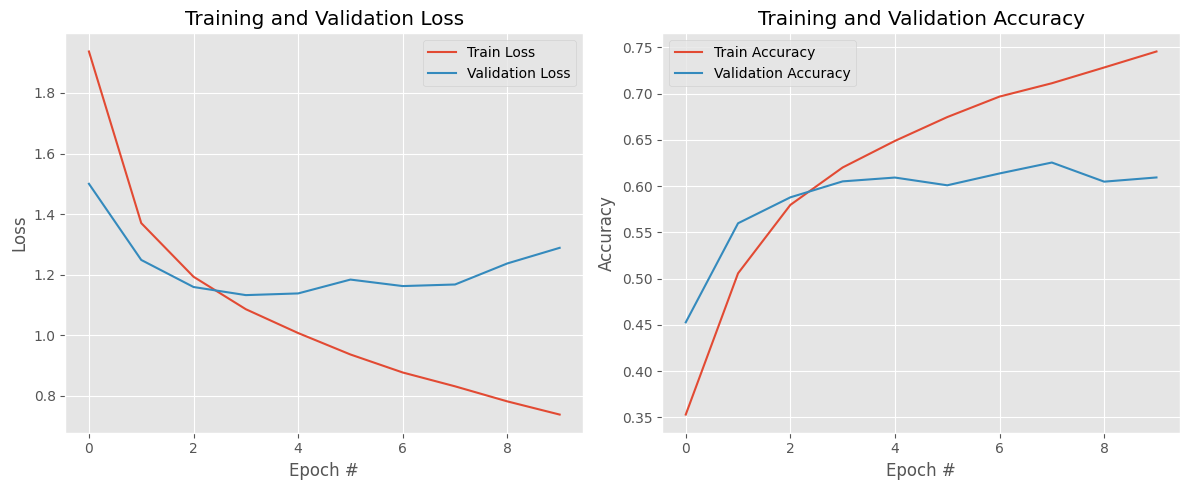

In [21]:
plt.style.use("ggplot")
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(np.arange(0, epochs), history.history["loss"], label="Train Loss")
plt.plot(np.arange(0, epochs), history.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(np.arange(0, epochs), history.history["accuracy"], label="Train Accuracy")
plt.plot(np.arange(0, epochs), history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()